In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import AxesGrid
import math
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from ignition_common import *

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)    # REGIONS WITH TUMOR
sub-CON01       2100.0          none                           0.0             0              
sub-CON02       2100.0          none                           0.0             0              
sub-CON03       2100.0          none                           0.0             0              
sub-CON04       2100.0          none                           0.0             0              
sub-CON05       2400.0          none                           0.0             0              
sub-CON06       2400.0          none                           0.0             0              
sub-CON07       2400.0          none                           0.0             0              
sub-CON08       2400.0          none                           0.0             0              
sub-CON09       2400.0          none                           0.0        

Mean FC for control subjects

In [3]:
compound_control_fc = np.dstack([sub.preop_data.fc_dk68 for _, sub in control_subset.items()])
mean_control_fc = np.mean(compound_control_fc, axis=2)
std_control_fc = np.std(compound_control_fc, axis=2)

Plot the minimum std and the maximum std for the compounded control fc

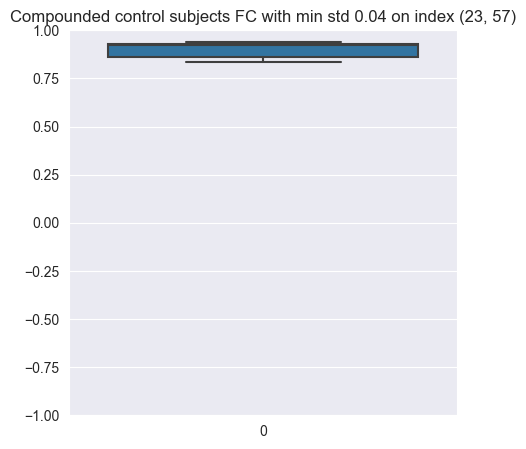

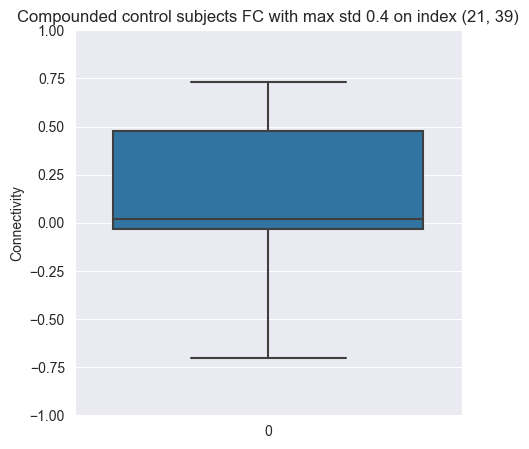

In [4]:
if True:
    aux = np.copy(std_control_fc)
    np.fill_diagonal(aux, np.Inf)
    (min_i, min_j) = np.unravel_index(np.argmin(aux), std_control_fc.shape)
    (max_i, max_j) = np.unravel_index(np.argmax(std_control_fc), std_control_fc.shape)

    plt.figure(figsize=(5, 5))
    plt.ylim(-1.0, 1.0)
    sns.boxplot(data=compound_control_fc[min_i][min_j])
    plt.title(
        "Compounded control subjects FC with min std "
        + str(round(std_control_fc[min_i][min_j], 2))
        + " on index ("+str(min_i)+", "+str(min_j)+")")
    plt.show()

    plt.figure(figsize=(5, 5))
    plt.ylim(-1.0, 1.0)
    g2 = sns.boxplot(data=compound_control_fc[max_i][max_j])
    plt.ylabel("Connectivity")
    plt.title(
        "Compounded control subjects FC with max std "
        + str(round(std_control_fc[max_i][max_j], 2))
        + " on index ("+str(max_i)+", "+str(max_j)+")")
    plt.show()

Display mean control fc heatmap


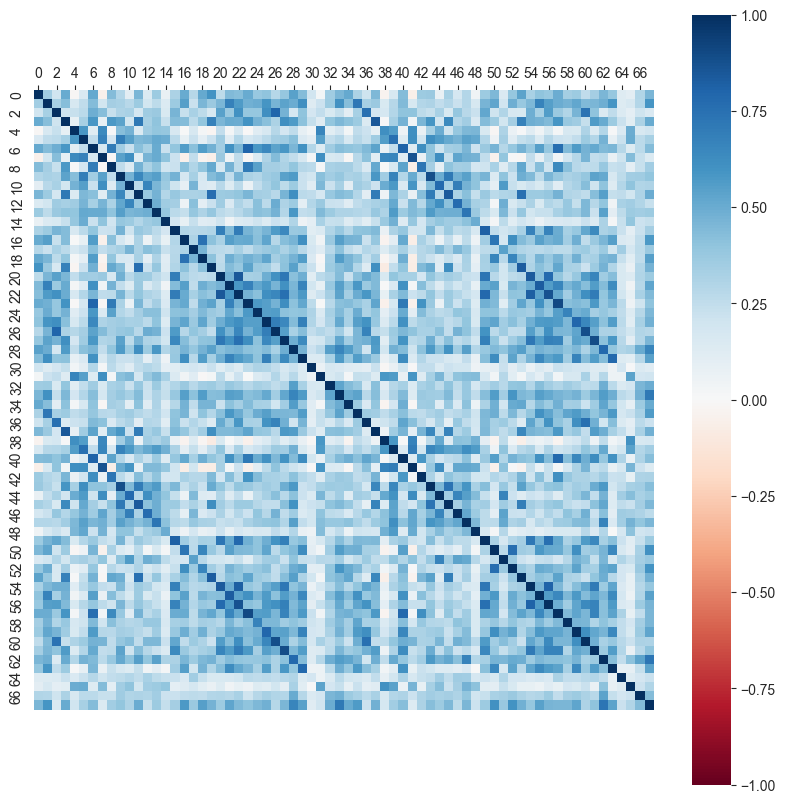

In [5]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(mean_control_fc, cmap="RdBu", square=True, vmin=-1.0, vmax=1.0)
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.show()

/tmp/ipykernel_27099/2497355670.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


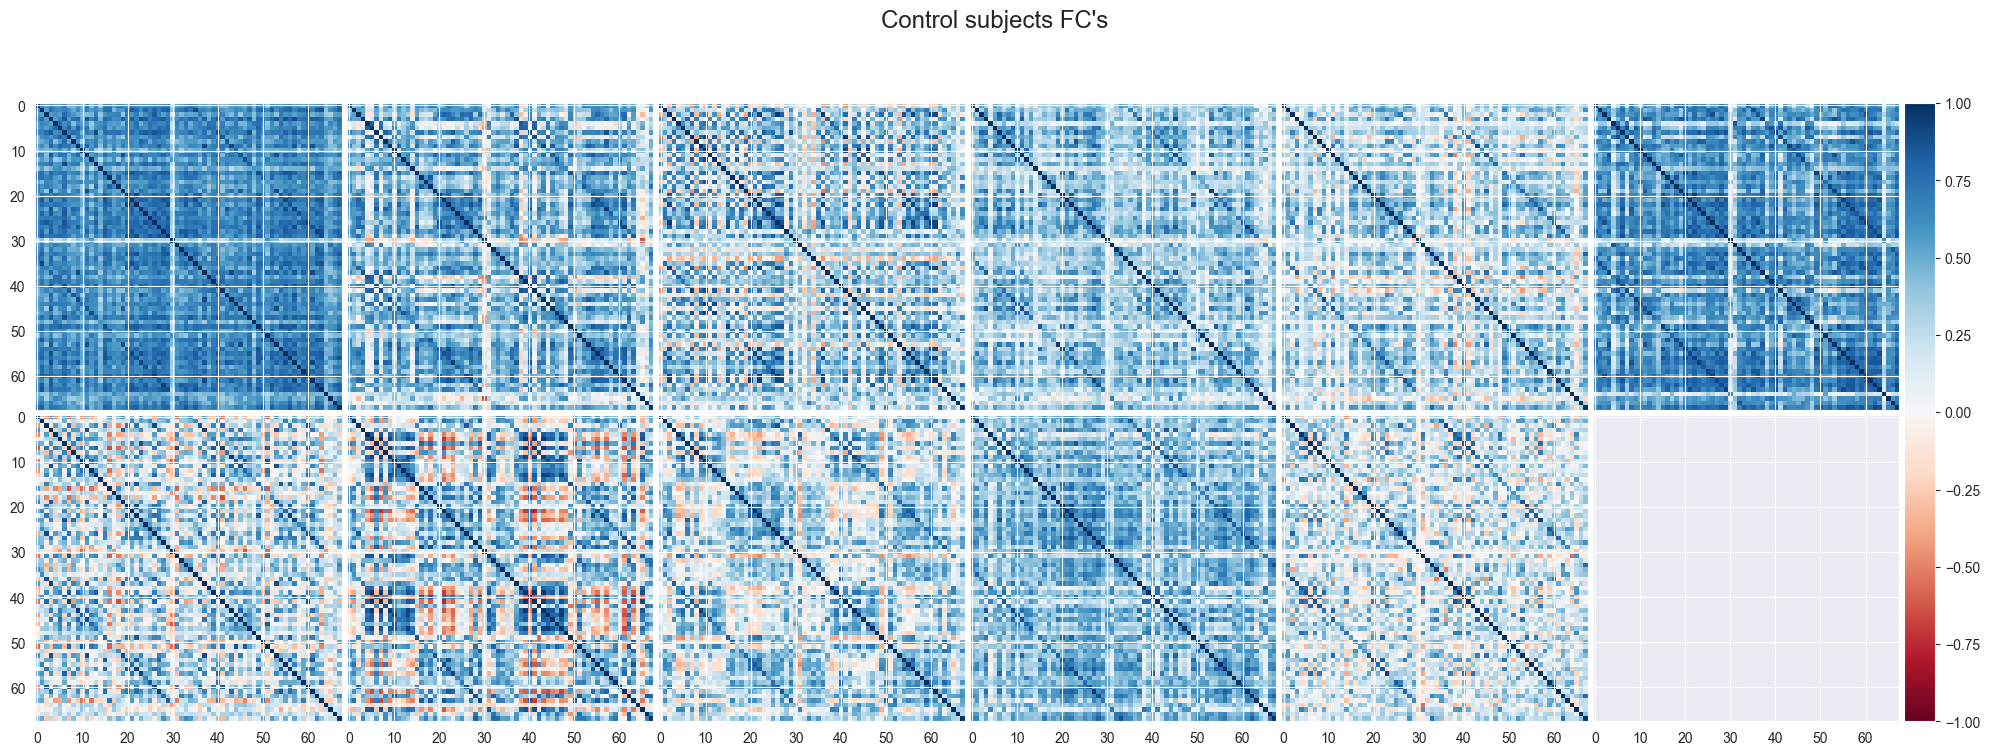

In [35]:
if True:
    fcs = [sub.preop_data.fc_dk68 for k, sub in control_subset.items()]
    fig = plt.figure(figsize=(20, 8))

    grid = AxesGrid(
        fig,
        111,
        nrows_ncols=(2, math.ceil(control_subset.count()/2)),
        axes_pad=0.05,
        share_all=True,
        label_mode="L",
        cbar_location="right",
        cbar_mode="single"
    )

    for val, ax in zip(fcs, grid):
        im = ax.imshow(val, vmin=-1.0, vmax=1.0, cmap="RdBu")
        # ax.heatmap(val, vmin=-1.0, vmax=1.0)

    grid.cbar_axes[0].colorbar(im)
    grid.axes_all

    # for cax in grid.cbar_axes:
    #     cax.toggle_label(False)

    # plt.suptitle("Control subjects FC's")
    fig.suptitle("Control subjects FC's", fontsize='xx-large')
    fig.tight_layout()
    plt.show()


Note: FC's has a positive tendency... Some control subjects they don't nearly have negative correlations(?)